In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df_US_Budget=pd.read_csv("Dataset/US_Budget_Dataset.csv")

df_US_Budget

,Unnamed: 0,tconst,originalTitle,isAdult,startYear,runtimeMinutes,genres_x,averageRating,numVotes,directors,writers,Actors,Actress,Director,adult,belongs_to_collection,budget,original_language,overview,popularity,production_companies,release_date,revenue,spoken_languages,status,tagline
0,0,tt0000574,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",6.1,736,nm0846879,nm0846879,"['Norman Campbell', 'Nicholas Brierley', 'John...",['Elizabeth Tait'],['Charles Tait'],False,NaN,0,en,Just as Fritz Lang’s Metropolis (1927) is test...,0.290549,"[{'name': 'Johnson and Gibson', 'id': 74308}, ...",1906-12-26,0.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,"The Most Sensational, The Most Thrilling and I..."
1,1,tt0002101,Cleopatra,0,1912,100,"Drama,History",5.1,521,nm0309130,"nm0765026,nm0309130","['Charles Sindelar', 'Mr. Howard', 'James R. W...","['Pearl Sindelar', 'Helen Gardner', 'Miss Robs...",['Charles L. Gaskill'],False,NaN,0,en,The fabled queen of Egypt's affair with Roman ...,0.142542,"[{'name': 'Helen Gardner Picture Players', 'id...",1912-11-13,0.0,[],Released,NaN
2,2,tt0002101,Cleopatra,0,1912,100,"Drama,History",5.1,521,nm0309130,"nm0765026,nm0309130","['Charles Sindelar', 'Mr. Howard', 'James R. W...","['Pearl Sindelar', 'Helen Gardner', 'Miss Robs...",['Charles L. Gaskill'],False,NaN,0,en,The fabled queen of Egypt's affair with Roman ...,0.142542,"[{'name': 'Helen Gardner Picture Players', 'id...",1912-11-13,0.0,[],Released,NaN
3,3,tt0002101,Cleopatra,0,1912,100,"Drama,History",5.1,521,nm0309130,"nm0765026,nm0309130","['Charles Sindelar', 'Mr. Howard', 'James R. W...","['Pearl Sindelar', 'Helen Gardner', 'Miss Robs...",['Charles L. Gaskill'],False,NaN,0,en,The fabled queen of Egypt's affair with Roman ...,0.142542,"[{'name': 'Helen Gardner Picture Players', 'id...",1912-11-13,0.0,[],Released,NaN
4,4,tt0002844,Fantômas - À l'ombre de la guillotine,0,1913,54,"Crime,Drama",7.0,2180,nm0275421,"nm0019855,nm0275421,nm0816232","['Georges Melchior', 'René Navarre', 'Edmund B...",['Renée Carl'],['Louis Feuillade'],False,"{'id': 188534, 'name': 'Fantômas Serial', 'pos...",0,fr,"For the arch-criminal Fantômas, no crime is to...",0.791727,[],1913-05-09,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36933,36933,tt6690310,Fei fan ren wu,0,2017,117,"Action,Crime",6.2,769,"nm0538320,nm1573851",nm0159039,"['Xuan Huang', 'Yihong Duan', 'Yanhui Wang']",['Yueting Lang'],"['Anthony Pun', 'Alan Mak']",False,NaN,0,zh,‘Extraordinary Mission’ is a new Chinese actio...,2.552316,"[{'name': 'Pop Movies', 'id': 5690}, {'name': ...",2017-03-31,0.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,NaN
36934,36934,tt6721848,Kolonya Cumhuriyeti,0,2017,110,Comedy,5.8,4354,nm4909521,"nm4679138,nm3097515,nm7165367,nm4909521,nm3708...","['Çaglar Çorumlu', 'Ugur Bilgin', 'Mahir Ipek']",['Büsra Pekin'],['Murat Kepez'],False,NaN,0,tr,NaN,0.173603,"[{'name': 'BKM Film', 'id': 15268}]",2017-04-20,0.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN
36935,36935,tt6731636,Jaesim,0,2017,119,"Crime,Drama",6.8,1133,nm2541369,nm2541369,"['Woo Jung', 'Ha-na Kim', 'Kang Ha-Neul', 'Ju-...","['Hyun-Sook Jun', 'Jung-Eun Lee', 'Kim Hae-soo...",['Tae-Yun Kim'],False,NaN,0,ko,"A taxi driver is found dead, and Hyun-woo, the...",1.956476,"[{'name': '이디오플랜', 'id': 86706}]",2017-02-15,0.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,10 years behind bars - the only chance to find...
36936,36936,tt6772874,Xi huan ni,0,2017,106,"Comedy,Drama,Romance",6.7,1537,nm3215871,"nm4886061,nm8430396,nm8981249,nm7163521","['Yi-zhou Sun', 'Takeshi Kaneshiro']","['Ming Xi', 'Dongyu Zhou']",['Derek Hui'],False,NaN,0,zh,"Lu Jin is a handsome, wealthy hotel executive ...",0.467960,[],2017-04-28,0.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,NaN


In [ ]:
df_US_Budget.columns

Index(['Unnamed: 0', 'tconst', 'originalTitle', 'isAdult', 'startYear',
       'runtimeMinutes', 'genres_x', 'averageRating', 'numVotes', 'directors',
       'writers', 'Actors', 'Actress', 'Director', 'adult',
       'belongs_to_collection', 'budget', 'original_language', 'overview',
       'popularity', 'production_companies', 'release_date', 'revenue',
       'spoken_languages', 'status', 'tagline'],
      dtype='object')

In [ ]:
df_US_Budget=df_US_Budget[['originalTitle','isAdult','startYear', 'runtimeMinutes','Actors', 'Actress', 'Director', 'genres_x', 'averageRating', 'numVotes','budget', 'popularity','production_companies', 'revenue' ]]

df_US_Budget=df_US_Budget[(df_US_Budget['budget']!=0) & (df_US_Budget['revenue']!=0.0)]

df_US_Budget.reset_index(drop=True,inplace=True)

df_US_Budget.shape

(7285, 14)

In [ ]:
df_US_Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   originalTitle         7285 non-null   object 
 1   isAdult               7285 non-null   int64  
 2   startYear             7285 non-null   int64  
 3   runtimeMinutes        7285 non-null   int64  
 4   Actors                7285 non-null   object 
 5   Actress               7285 non-null   object 
 6   Director              7285 non-null   object 
 7   genres_x              7285 non-null   object 
 8   averageRating         7285 non-null   float64
 9   numVotes              7285 non-null   int64  
 10  budget                7285 non-null   int64  
 11  popularity            7285 non-null   float64
 12  production_companies  7285 non-null   object 
 13  revenue               7285 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 796.9+ KB


In [ ]:
df_US_Budget['production_companies']=df_US_Budget.production_companies.str.replace('[','')
df_US_Budget['production_companies']=df_US_Budget.production_companies.str.replace(']','')

df_US_Budget=df_US_Budget[(df_US_Budget['production_companies']!="")]

final_list = df_US_Budget['production_companies'].tolist()

df_US_Budget.shape

(7151, 14)

In [ ]:
final=[]
for i in range(len(final_list)):
     Dict = eval(final_list[i])
     if isinstance(Dict,dict):
        final.append(Dict['name'])
     else:
          X=''
          for tup in Dict:
              X=X+tup['name']+','
          final.append(X)

In [ ]:
for i in range(len(final)):
    if(final[i][-1]==','):
        temp=final[i][:-1]
        final[i]=temp

In [ ]:
df_US_Budget['production_companies']=final

In [ ]:
df_US_Budget['Actress']=df_US_Budget['Actress'].str.split("[").str.get(1)
df_US_Budget['Actress']=df_US_Budget['Actress'].str.split("]").str.get(0)
df_US_Budget['Actress']=df_US_Budget['Actress'].str.replace('"','')
df_US_Budget['Actress']=df_US_Budget['Actress'].str.replace("'",'')

df_US_Budget['Actors']=df_US_Budget['Actors'].str.split("[").str.get(1)
df_US_Budget['Actors']=df_US_Budget['Actors'].str.split("]").str.get(0)
df_US_Budget['Actors']=df_US_Budget['Actors'].str.replace('"','')
df_US_Budget['Actors']=df_US_Budget['Actors'].str.replace("'",'')

df_US_Budget['Director']=df_US_Budget['Director'].str.split("[").str.get(1)
df_US_Budget['Director']=df_US_Budget['Director'].str.split("]").str.get(0)
df_US_Budget['Director']=df_US_Budget['Director'].str.replace('"','')
df_US_Budget['Director']=df_US_Budget['Director'].str.replace("'",'')


In [ ]:
df_US_Budget.columns=['Moviename', 'isAdult', 'releaseYear', 'runtimeMinutes',
       'Actors', 'Actress', 'Director', 'genres', 'averageRating',
       'numVotes', 'budget', 'popularity', 'production_companies', 'revenue']

In [ ]:
#Converting dollar to million dollar
df_US_Budget['budget']=df_US_Budget['budget']/1000000
df_US_Budget['revenue']=df_US_Budget['revenue']/1000000

In [ ]:
df_US_Budget['Profit']=df_US_Budget['revenue']-df_US_Budget['budget']

In [ ]:
"""top 5 movies with highest budget"""

df_US_Budget.groupby('Moviename')[['budget']].mean().sort_values(by='budget',ascending=False).head(5)

,budget
Moviename,
Pirates of the Caribbean: On Stranger Tides,380.0
Pirates of the Caribbean: At World's End,300.0
Superman Returns,270.0
John Carter,260.0
Tangled,260.0


**Pirates of the Caribbean: On Stranger Tides** has the highest budget of **380** million dollar

In [ ]:
"""top5 movies with highest revenue"""

df_US_Budget.groupby('Moviename')[['revenue']].mean().sort_values(by='revenue',ascending=False).head(5)

,revenue
Moviename,
Avatar,2787.965087
Star Wars: Episode VII - The Force Awakens,2068.223624
Jurassic World,1513.528810
Harry Potter and the Deathly Hallows: Part 2,1342.000000
Frozen,1274.219009


**Avatar** has the highest revenue of **2787.965087** million dollar


In [ ]:
"""top 5 movies with highest profit"""

df_US_Budget.groupby('Moviename')[['Profit']].mean().sort_values(by='Profit',ascending=False).head(5)

,Profit
Moviename,
Avatar,2550.965087
Star Wars: Episode VII - The Force Awakens,1823.223624
Jurassic World,1363.528810
Harry Potter and the Deathly Hallows: Part 2,1217.000000
Frozen,1124.219009


**Avatar** has the highest profit of **2550.965087** million dollar

In [ ]:
"""Bottom 5 movies with lowest budget"""

df_US_Budget.groupby('Moviename')[['budget']].mean().sort_values(by='budget',ascending=False).tail(5)

,budget
Moviename,
Tere Naam,0.000001
Lost & Found,0.000001
Less Than Zero,0.000001
The Letters,0.000001
"Love, Wedding, Marriage",0.000001


In [ ]:
"""Bottom 5 movies with lowest revenue"""

df_US_Budget.groupby('Moviename')[['revenue']].mean().sort_values(by='revenue',ascending=False).tail(5)

,revenue
Moviename,
Vsyo i srazu,0.000003
Tere Naam,0.000002
The Merry Widow,0.000001
Mute Witness,0.000001
The Letters,0.000001


In [ ]:
"""Bottom 5 movies with lowest profit"""

df_US_Budget.groupby('Moviename')[['Profit']].mean().sort_values(by='Profit',ascending=False).tail(5)

,Profit
Moviename,
Metropolis,-91.969578
The Adventures of Pluto Nash,-92.896027
The 13th Warrior,-98.301101
Valerian and the City of a Thousand Planets,-107.447384
Mars Needs Moms,-111.007242


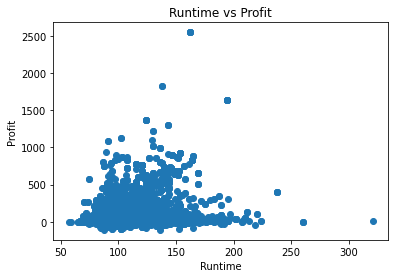

In [ ]:
"""Scatter plot of runtime vs profit"""

runtime = df_US_Budget['runtimeMinutes'].tolist()
profit = df_US_Budget['Profit'].tolist()

plt.scatter(runtime,profit)
plt.title('Runtime vs Profit')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.show()

As runtime is increasing there is increase in profit for some movies.

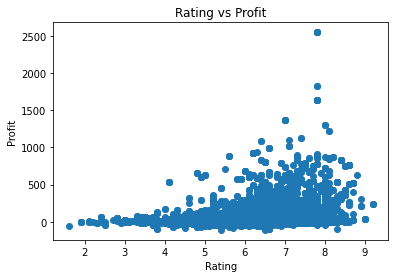

In [ ]:
""" scatter plot of rating vs profit"""

rating = df_US_Budget['averageRating'].tolist()
profit = df_US_Budget['Profit'].tolist()

plt.scatter(rating,profit)
plt.title('Rating vs Profit')
plt.xlabel('Rating')
plt.ylabel('Profit')
plt.show()

From above scatter we cn interpret that as rating is increasing profit is also increasing.

In [ ]:
"""Top prodcuction house with most number of movies"""

l=[]
for x in df_US_Budget['production_companies']:
   l.append(x.split(','))

prodlist=[]
for x in l:
   for y in x:
            prodlist.append(y)

uniquephouse=[]
for x in prodlist:
  if x not in uniquephouse:
     uniquephouse.append(x)
print("The number of production house is %d" %len(uniquephouse))


The number of production house is 4668


In [ ]:
from collections import Counter
c=Counter(prodlist)

c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount

{'Columbia Pictures': 360,
 'New Line Cinema': 247,
 'Paramount Pictures': 551,
 'Twentieth Century Fox Film Corporation': 532,
 'Universal Pictures': 573,
 'Warner Bros.': 601}

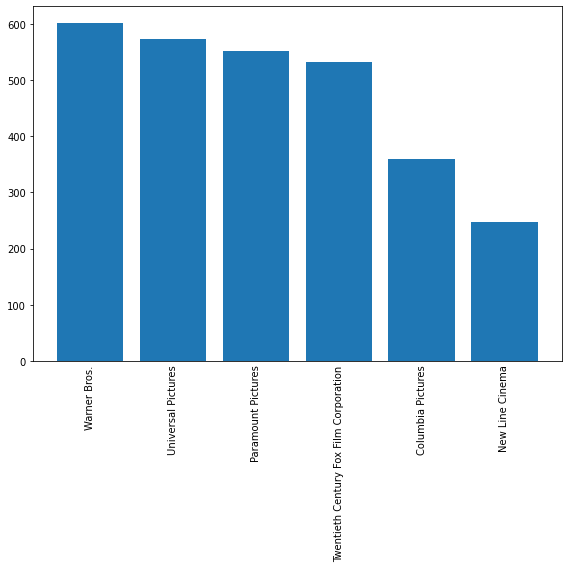

In [ ]:
fig,x=plt.subplots(figsize=(8,8))
plt.bar(*zip(*moviecount.items()))
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

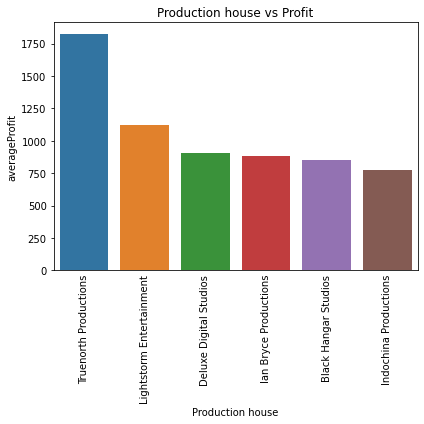

In [ ]:
"""Average profit for each production house and plotting top 6"""

avgprofit=[]
for x in uniquephouse:
      avgprofit.append(df_US_Budget[df_US_Budget['production_companies'].str.contains(x)].Profit.mean())

Averageprofit = pd.DataFrame(zip(uniquephouse,avgprofit), columns =['Production house','averageProfit'])
Averageprofit.sort_values('averageProfit',ascending=False,inplace=True)
Averageprofit=Averageprofit.head(6)

fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Production house',
            y = 'averageProfit',
            data =Averageprofit)
plt.title('Production house vs Profit')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Movies produced by **Truenorth Production** has the highest average profit

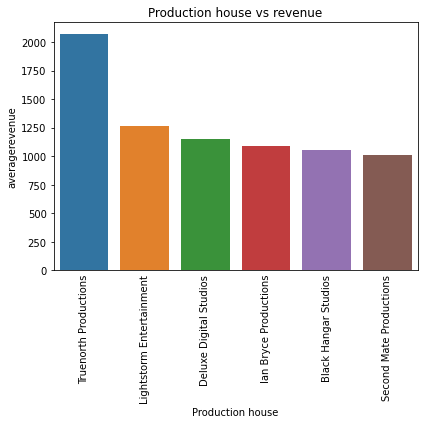

In [ ]:
"""Average revenue for each production house and plotting top 6"""

avgrevenue=[]
for x in uniquephouse:
      avgrevenue.append(df_US_Budget[df_US_Budget['production_companies'].str.contains(x)].revenue.mean())

Averagerevenue = pd.DataFrame(zip(uniquephouse,avgrevenue), columns =['Production house','averagerevenue'])
Averagerevenue.sort_values('averagerevenue',ascending=False,inplace=True)
Averagerevenue=Averagerevenue.head(6)

fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Production house',
            y = 'averagerevenue',
            data =Averagerevenue)
plt.title('Production house vs revenue')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Movies produced by **Truenorth Production** has the highest average revenue

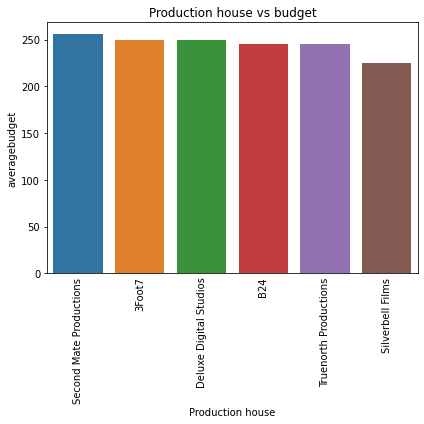

In [ ]:
"""Average budget for each production house and plotting top 6"""

avgbudget=[]
for x in uniquephouse:
      avgbudget.append(df_US_Budget[df_US_Budget['production_companies'].str.contains(x)].budget.mean())

Averagebudget = pd.DataFrame(zip(uniquephouse,avgbudget), columns =['Production house','averagebudget'])
Averagebudget.sort_values('averagebudget',ascending=False,inplace=True)
Averagebudget=Averagebudget.head(6)

fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Production house',
            y = 'averagebudget',
            data =Averagebudget)
plt.title('Production house vs budget')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Movies produced by **Second Mate Productions** has the highest average budget

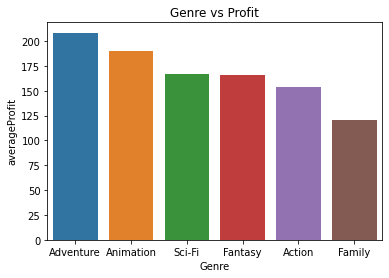

In [ ]:
"""Top6 genres with most profit films"""

l=[]
for x in df_US_Budget['genres']:
   l.append(x.split(','))

genrelist=[]
for x in l:
   for y in x:
            genrelist.append(y)

uniquegenre=[]
for x in genrelist:
  if x not in uniquegenre:
     uniquegenre.append(x)

avgprofit=[]
for x in uniquegenre:
      avgprofit.append(df_US_Budget[df_US_Budget['genres'].str.contains(x)].Profit.mean())

Averageprofit = pd.DataFrame(zip(uniquegenre,avgprofit), columns =['Genre','averageProfit'])
Averageprofit.sort_values('averageProfit',ascending=False,inplace=True)
Averageprofit=Averageprofit.head(6)

sns.barplot(x = 'Genre',
            y = 'averageProfit',
            data =Averageprofit)
plt.title('Genre vs Profit')
plt.show()

Movies of **Adventure** genre has most average profit

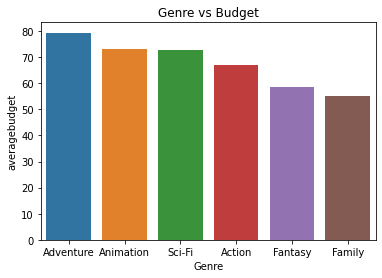

In [ ]:
"""Top6 genres with most budget films"""

avgbudget=[]
for x in uniquegenre:
      avgbudget.append(df_US_Budget[df_US_Budget['genres'].str.contains(x)].budget.mean())

Averagebudget = pd.DataFrame(zip(uniquegenre,avgbudget), columns =['Genre','averagebudget'])
Averagebudget.sort_values('averagebudget',ascending=False,inplace=True)
Averagebudget=Averagebudget.head(6)

sns.barplot(x = 'Genre',
            y = 'averagebudget',
            data =Averagebudget)
plt.title('Genre vs Budget')
plt.show()


Movies of **Adventure** genre has most average budget

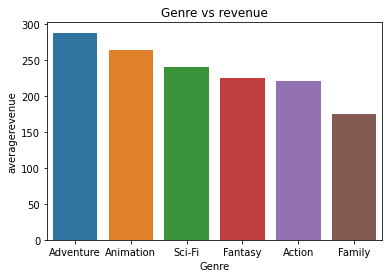

In [ ]:

"""Top6 genres with most revenue films"""

avgrevenue=[]
for x in uniquegenre:
      avgrevenue.append(df_US_Budget[df_US_Budget['genres'].str.contains(x)].revenue.mean())

Averagerevenue = pd.DataFrame(zip(uniquegenre,avgrevenue), columns =['Genre','averagerevenue'])
Averagerevenue.sort_values('averagerevenue',ascending=False,inplace=True)
Averagerevenue=Averagerevenue.head(6)

sns.barplot(x = 'Genre',
            y = 'averagerevenue',
            data =Averagerevenue)
plt.title('Genre vs revenue')
plt.show()

Movies of **Adventure** genre has most average revenue

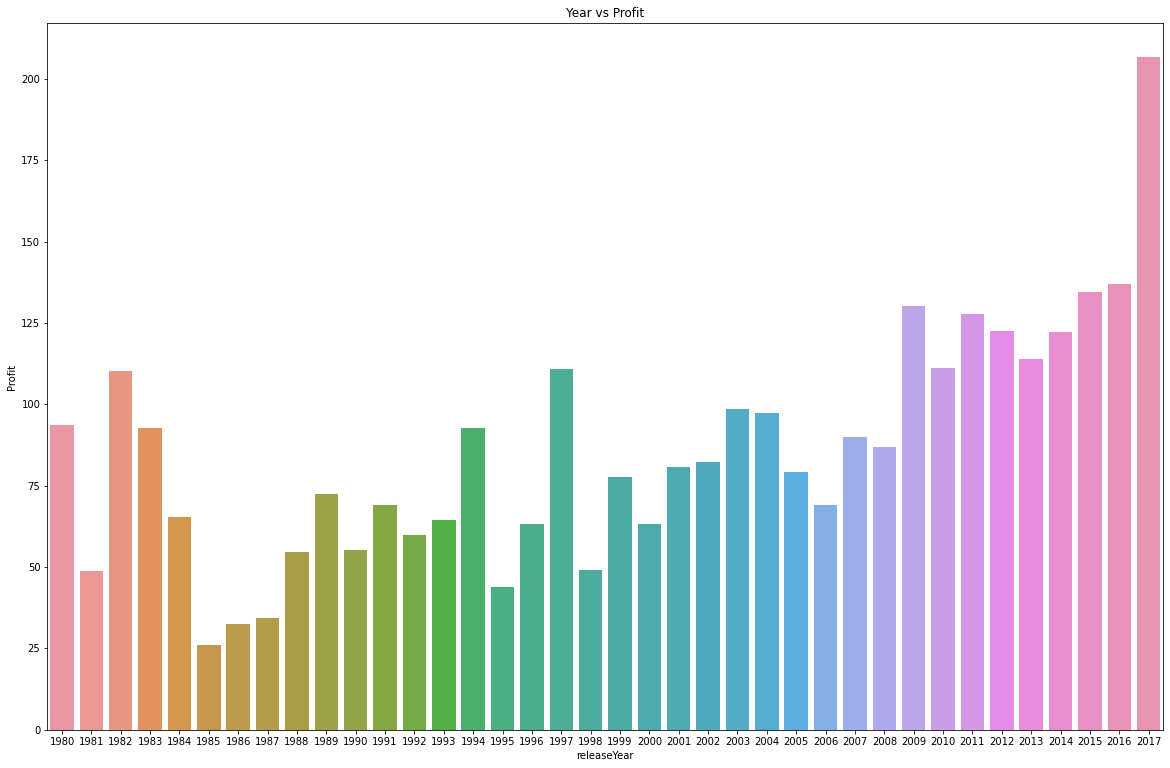

In [ ]:
"""Profit over the years"""

df_year=df_US_Budget.copy()
df_year=df_year[df_year['releaseYear']>=1980]
df_year=(df_year.groupby(df_year['releaseYear'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('Profit',ascending=False,inplace=True)
df_year=df_year[['releaseYear','Profit']].reset_index(drop=True)

plt.figure(figsize=(20,13))
sns.barplot(x = 'releaseYear',
            y = 'Profit',
            data = df_year)
plt.title('Year vs Profit')
plt.show()

Year 2017 has the highest average profit

Year 1985 has the lowest average profit

The average profit is generally increasing over the years but there is decreasing profit for some years.

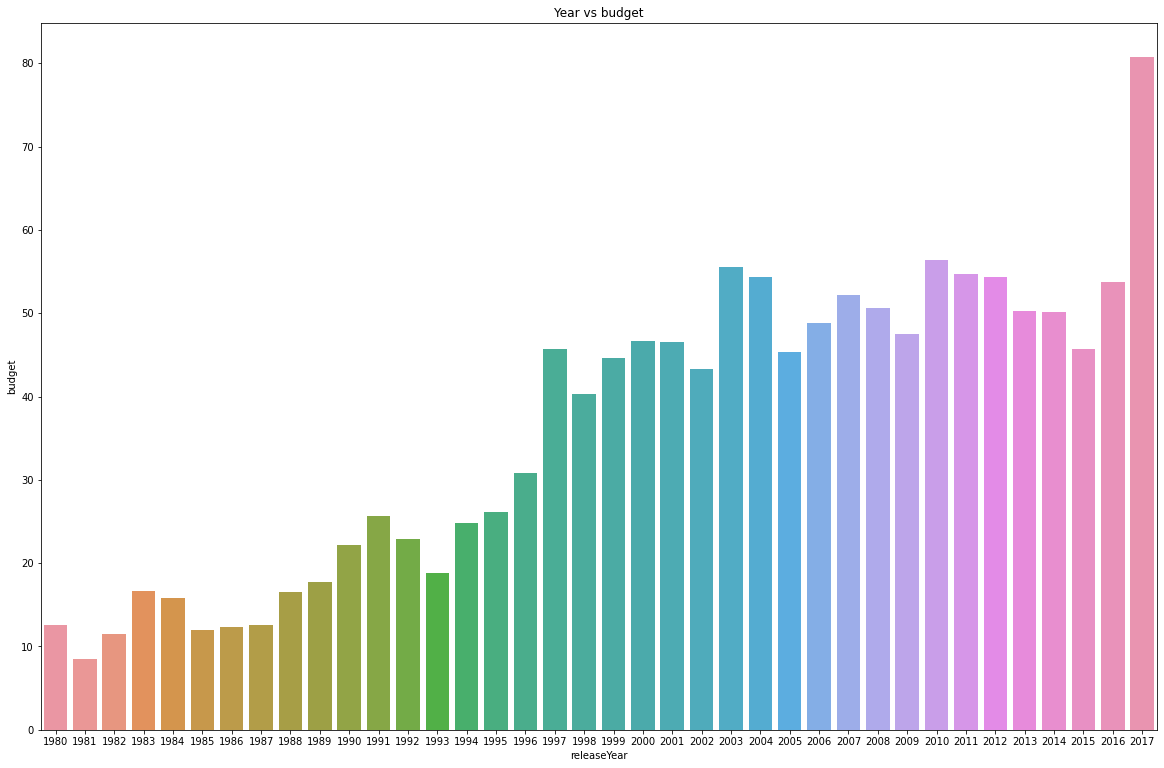

In [ ]:
"""Budget over the years"""

df_year=df_US_Budget.copy()
df_year=df_year[df_year['releaseYear']>=1980]
df_year=(df_year.groupby(df_year['releaseYear'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('budget',ascending=False,inplace=True)
df_year=df_year[['releaseYear','budget']].reset_index(drop=True)

plt.figure(figsize=(20,13))
sns.barplot(x = 'releaseYear',
            y = 'budget',
            data = df_year)
plt.title('Year vs budget')
plt.show()

Year **2017** has the highest average budget

Year **1981** has the lowest average budget

The average budget is generally increasing over the years but there is decreasing budget for some years.

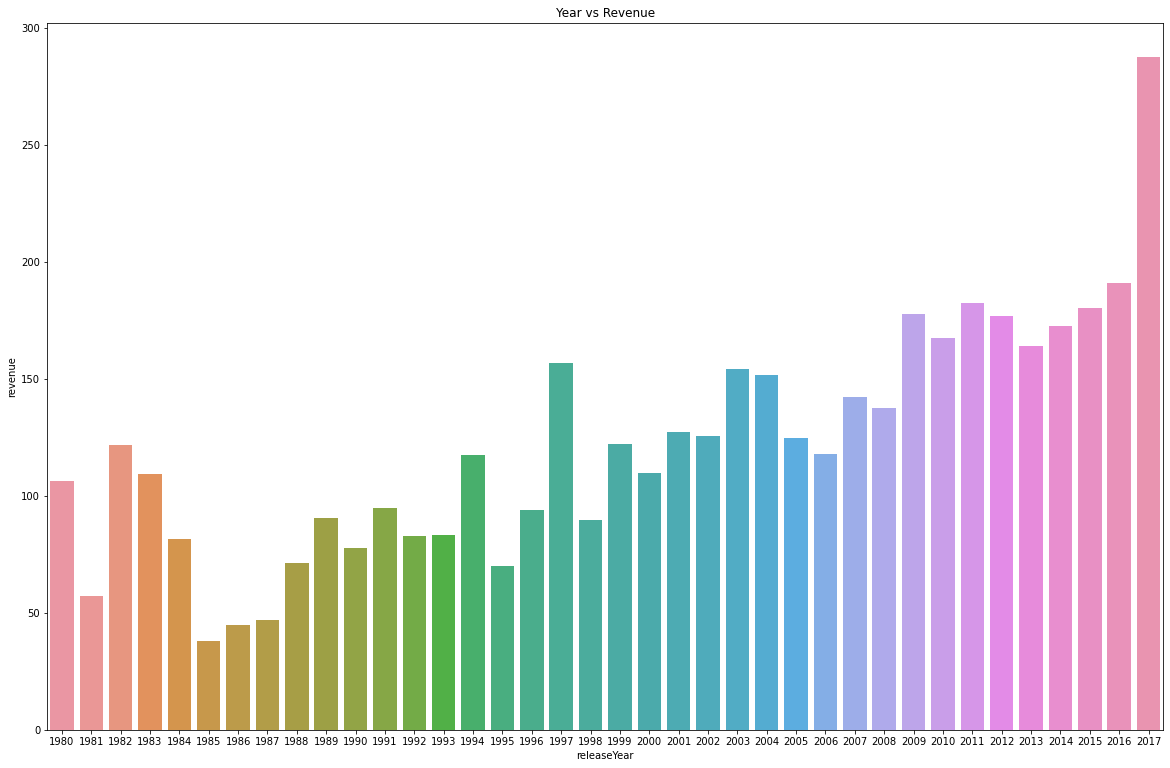

In [ ]:
"""Revenue over the years"""

df_year=df_US_Budget.copy()
df_year=df_year[df_year['releaseYear']>=1980]
df_year=(df_year.groupby(df_year['releaseYear'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('revenue',ascending=False,inplace=True)
df_year=df_year[['releaseYear','revenue']].reset_index(drop=True)

plt.figure(figsize=(20,13))
sns.barplot(x = 'releaseYear',
            y = 'revenue',
            data = df_year)
plt.title('Year vs Revenue')
plt.show()

Year **2017** has the highest average revenue

Year **1985** has the lowest average revenue

The average revenue is generally increasing over the years but there is decreasing budget for some years.